Візьміть датасет movielens і побудуйте модель матричної факторизації. У даній бібліотеці він має назву SVD. Підберіть найкращі параметри за допомогою крос-валідації, також поекспериментуйте з іншими алгоритмами розрахунків (SVD++, NMF) і оберіть той, який буде оптимальним.

In [2]:
pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=2811598 sha256=a07979fc51afd14d5a2a3c51080982c0b5c3ed4e2636f5872ebee6fc1e282cd7
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [3]:
import pandas as pd
from surprise import Dataset, Reader
from surprise import SVDpp, SVD, NMF, NormalPredictor, BaselineOnly, SlopeOne, KNNBasic, KNNWithMeans, KNNBaseline, CoClustering
from surprise.model_selection import train_test_split, cross_validate
from surprise import accuracy
from hyperopt import hp
import zipfile

In [4]:
filename = '/content/drive/MyDrive/DS/Data_hw7.zip'
with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall()

In [5]:
reader = Reader(line_format=u'user item rating', sep=',', rating_scale=(1, 6), skip_lines=1)
data = Dataset.load_from_file('ml-latest-small/ratings.csv', reader=reader)
display(data)

In [6]:
trainset, testset = train_test_split(data, test_size=0.2)
print('Total ratings in dataset:', len(list(data.raw_ratings)))
print('Len of trainset:', len(list(trainset.all_ratings())))
print('Len of testset:', len(list(testset)))

Total ratings in dataset: 100836
Len of trainset: 80668
Len of testset: 20168


Алгоритм SVD

In [7]:
algo_svd = SVD(n_factors=200, n_epochs=5, random_state=0)
cv_results = cross_validate(algo_svd, data, measures=["RMSE", "MAE"], cv=3, verbose=True)
svd_rmse_mean = cv_results['test_rmse'].mean()
svd_mae_mean = cv_results['test_mae'].mean()
print('RMSE mean:', svd_rmse_mean)
print('MAE mean:', svd_mae_mean)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9045  0.9001  0.9044  0.9030  0.0020  
MAE (testset)     0.7003  0.6989  0.6993  0.6995  0.0006  
Fit time          0.31    0.53    0.47    0.44    0.09    
Test time         0.24    0.23    0.85    0.44    0.29    
RMSE mean: 0.902979782029779
MAE mean: 0.6994922222668345


Алгоритм SVD++

In [8]:
algo_svd_pp = SVDpp(n_factors=200, n_epochs=5, random_state=0)
cv_results = cross_validate(algo_svd_pp, data, measures=["RMSE", "MAE"], cv=3, verbose=True)
svd_pp_rmse_mean = cv_results['test_rmse'].mean()
svd_pp_mae_mean = cv_results['test_mae'].mean()
print('RMSE mean:', svd_pp_rmse_mean)
print('MAE mean:', svd_pp_mae_mean)

Evaluating RMSE, MAE of algorithm SVDpp on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.8894  0.8907  0.8878  0.8893  0.0012  
MAE (testset)     0.6855  0.6890  0.6852  0.6866  0.0018  
Fit time          128.41  124.91  124.57  125.96  1.74    
Test time         14.31   14.13   14.35   14.26   0.09    
RMSE mean: 0.8892880964566849
MAE mean: 0.6865571185505388


Алгоритм NMF

In [9]:
algo_nmf = NMF()
cv_results = cross_validate(algo_nmf, data, measures=["RMSE", "MAE"], cv=3, verbose=True)
nmf_rmse_mean = cv_results['test_rmse'].mean()
nmf_mae_mean = cv_results['test_mae'].mean()
print('RMSE mean:', nmf_rmse_mean)
print('MAE mean:', nmf_mae_mean)

Evaluating RMSE, MAE of algorithm NMF on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9295  0.9421  0.9318  0.9345  0.0055  
MAE (testset)     0.7145  0.7217  0.7176  0.7179  0.0030  
Fit time          1.45    1.47    1.43    1.45    0.02    
Test time         0.24    0.13    0.14    0.17    0.05    
RMSE mean: 0.9344626394640189
MAE mean: 0.7179346097568469


Алгоритм NormalPredictor

In [10]:
algo_np = NormalPredictor()
cv_results = cross_validate(algo_np, data, measures=["RMSE", "MAE"], cv=3, verbose=True)
np_rmse_mean = cv_results['test_rmse'].mean()
np_mae_mean = cv_results['test_mae'].mean()
print('RMSE mean:', np_rmse_mean)
print('MAE mean:', np_mae_mean)

Evaluating RMSE, MAE of algorithm NormalPredictor on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.4551  1.4599  1.4674  1.4608  0.0051  
MAE (testset)     1.1626  1.1646  1.1736  1.1669  0.0048  
Fit time          0.06    0.08    0.07    0.07    0.01    
Test time         0.22    0.10    0.09    0.14    0.06    
RMSE mean: 1.4608066143026213
MAE mean: 1.1669030208077806


Алгоритм BaselineOnly

In [11]:
algo_bl = BaselineOnly()
cv_results = cross_validate(algo_bl, data, measures=["RMSE", "MAE"], cv=3, verbose=True)
bl_rmse_mean = cv_results['test_rmse'].mean()
bl_mae_mean = cv_results['test_mae'].mean()
print('RMSE mean:', bl_rmse_mean)
print('MAE mean:', bl_mae_mean)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Evaluating RMSE, MAE of algorithm BaselineOnly on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.8721  0.8813  0.8764  0.8766  0.0038  
MAE (testset)     0.6716  0.6805  0.6766  0.6763  0.0037  
Fit time          0.09    0.08    0.20    0.12    0.06    
Test time         0.23    0.08    0.32    0.21    0.10    
RMSE mean: 0.8766000705671303
MAE mean: 0.6762507874788805


Алгоритм SlopeOne

In [12]:
algo_so = SlopeOne()
cv_results = cross_validate(algo_so, data, measures=["RMSE", "MAE"], cv=3, verbose=True)
so_rmse_mean = cv_results['test_rmse'].mean()
so_mae_mean = cv_results['test_mae'].mean()
print('RMSE mean:', so_rmse_mean)
print('MAE mean:', so_mae_mean)

Evaluating RMSE, MAE of algorithm SlopeOne on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9079  0.9131  0.9129  0.9113  0.0024  
MAE (testset)     0.6958  0.6967  0.6985  0.6970  0.0011  
Fit time          2.52    1.98    3.10    2.53    0.46    
Test time         5.69    7.50    6.72    6.63    0.74    
RMSE mean: 0.9113179048710932
MAE mean: 0.6969737408953073


Алгоритм KNNBasic

In [13]:
algo_knn_b = KNNBasic()
cv_results = cross_validate(algo_knn_b, data, measures=["RMSE", "MAE"], cv=3, verbose=True)
knn_b_rmse_mean = cv_results['test_rmse'].mean()
knn_b_mae_mean = cv_results['test_mae'].mean()
print('RMSE mean:', knn_b_rmse_mean)
print('MAE mean:', knn_b_mae_mean)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9560  0.9487  0.9601  0.9550  0.0047  
MAE (testset)     0.7358  0.7246  0.7378  0.7328  0.0058  
Fit time          0.04    0.06    0.06    0.05    0.01    
Test time         1.30    1.40    1.26    1.32    0.06    
RMSE mean: 0.9549520645405187
MAE mean: 0.7327654804066004


Алгоритм KNNWithMeans

In [14]:
algo_knn_m = KNNWithMeans()
cv_results = cross_validate(algo_knn_m, data, measures=["RMSE", "MAE"], cv=3, verbose=True)
knn_m_rmse_mean = cv_results['test_rmse'].mean()
knn_m_mae_mean = cv_results['test_mae'].mean()
print('RMSE mean:', knn_m_rmse_mean)
print('MAE mean:', knn_m_mae_mean)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9046  0.9070  0.9028  0.9048  0.0017  
MAE (testset)     0.6910  0.6943  0.6896  0.6916  0.0019  
Fit time          0.07    0.08    0.07    0.07    0.00    
Test time         1.35    1.59    1.40    1.44    0.10    
RMSE mean: 0.9047958295584424
MAE mean: 0.6916434321490864


Алгоритм KNNBaseline

In [15]:
algo_knn_bl = KNNBaseline()
cv_results = cross_validate(algo_knn_bl, data, measures=["RMSE", "MAE"], cv=3, verbose=True)
knn_bl_rmse_mean = cv_results['test_rmse'].mean()
knn_bl_mae_mean = cv_results['test_mae'].mean()
print('RMSE mean:', knn_bl_rmse_mean)
print('MAE mean:', knn_bl_mae_mean)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBaseline on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.8809  0.8809  0.8847  0.8822  0.0018  
MAE (testset)     0.6757  0.6734  0.6760  0.6750  0.0011  
Fit time          0.21    0.15    0.16    0.17    0.03    
Test time         2.70    1.66    1.80    2.05    0.46    
RMSE mean: 0.8821949950230108
MAE mean: 0.675008495524887


Алгоритм CoClustering

In [16]:
algo_cc = CoClustering()
cv_results = cross_validate(algo_cc, data, measures=["RMSE", "MAE"], cv=3, verbose=True)
cc_rmse_mean = cv_results['test_rmse'].mean()
cc_mae_mean = cv_results['test_mae'].mean()
print('RMSE mean:', cc_rmse_mean)
print('MAE mean:', cc_mae_mean)

Evaluating RMSE, MAE of algorithm CoClustering on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9501  0.9500  0.9557  0.9519  0.0027  
MAE (testset)     0.7366  0.7366  0.7418  0.7383  0.0024  
Fit time          1.71    1.51    1.65    1.62    0.08    
Test time         0.11    0.31    0.18    0.20    0.08    
RMSE mean: 0.9519274967420149
MAE mean: 0.7383397708361068


Зведемо отримані результати RMSE та MAE в один датасет, для побудування порівняльного графіку

In [17]:
list_algorythms = ['SVD', 'SVD++', 'NMF', 'NormalPredictor', 'BaselineOnly', 'SlopeOne', 'KNNBasic', 'KNNWithMeans', 'KNNBaseline', 'CoClustering']
list_rmse = [svd_rmse_mean, svd_pp_rmse_mean, nmf_rmse_mean, np_rmse_mean, bl_rmse_mean, so_rmse_mean, knn_b_rmse_mean, knn_m_rmse_mean, knn_bl_rmse_mean, cc_rmse_mean]
list_mae = [svd_mae_mean, svd_pp_mae_mean, nmf_mae_mean, np_mae_mean, bl_mae_mean, so_mae_mean, knn_b_mae_mean, knn_m_mae_mean, knn_bl_mae_mean, cc_mae_mean]

In [18]:
results = pd.DataFrame({'Algorythms': list_algorythms, 'RMSE': list_rmse, 'MAE': list_mae})
display(results)

,Algorythms,RMSE,MAE
0,SVD,0.902980,0.699492
1,SVD++,0.889288,0.686557
2,NMF,0.934463,0.717935
3,NormalPredictor,1.460807,1.166903
4,BaselineOnly,0.876600,0.676251
5,SlopeOne,0.911318,0.696974
6,KNNBasic,0.954952,0.732765
7,KNNWithMeans,0.904796,0.691643
8,KNNBaseline,0.882195,0.675008
9,CoClustering,0.951927,0.738340


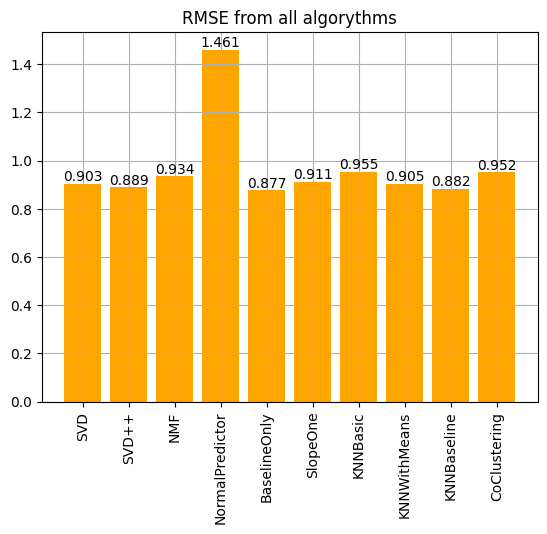

In [19]:
from numpy import size
import matplotlib.pyplot as plt

plt.bar(results.Algorythms, results.RMSE, color='orange')
plt.xticks(rotation=90)
for i, value in enumerate(results.RMSE):
    plt.text(i, value, str(round(value, 3)), ha='center', va='bottom')
plt.title('RMSE from all algorythms')
plt.grid()
plt.show()

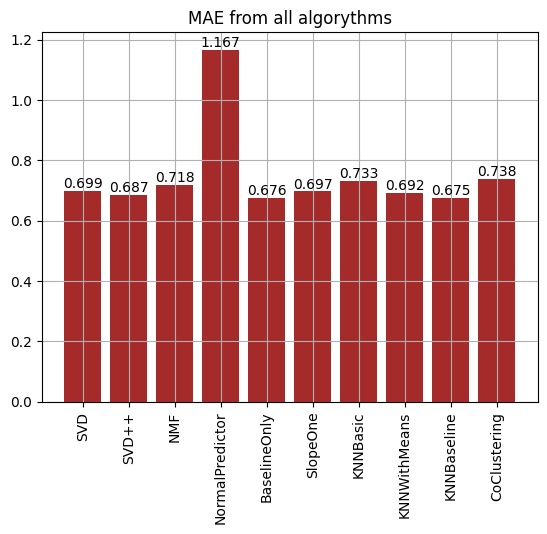

In [20]:
plt.bar(results.Algorythms, results.MAE, color='brown')
plt.xticks(rotation=90)
for i, value in enumerate(results.MAE):
    plt.text(i, value, str(round(value, 3)), ha='center', va='bottom')
plt.title('MAE from all algorythms')
plt.grid()
plt.show()

Резумуючи, можна сказати, що алгоритми KNNBasic та CoClustering відпрацювали найкраще